### Some basic machine learning using Keras

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Regression

In [3]:
df = pd.read_csv('./data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


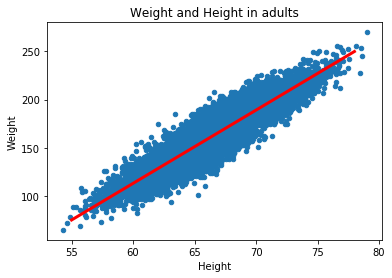

In [6]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

#### Linear regression in Keras

In [20]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [39]:
## create data
X = df[['Height']].values
y_true = df['Weight'].values

X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)


In [40]:
model = Sequential()
model.add(Dense(1, input_shape=(1,))) ## similuate a linear regression with one variable and one output
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer=Adam(lr=0.1),loss='mean_squared_error')

In [42]:
model.fit(X_train,y_train,epochs=40,)

Epoch 1/40
8000/8000 [==============================] - 1s 65us/step - loss: 1431.4265
Epoch 2/40
8000/8000 [==============================] - 0s 49us/step - loss: 568.7648
Epoch 3/40
8000/8000 [==============================] - 0s 50us/step - loss: 565.6293
Epoch 4/40
8000/8000 [==============================] - 0s 46us/step - loss: 559.8598
Epoch 5/40
8000/8000 [==============================] - 0s 47us/step - loss: 557.8462
Epoch 6/40
8000/8000 [==============================] - 0s 44us/step - loss: 548.6976
Epoch 7/40
8000/8000 [==============================] - 0s 51us/step - loss: 544.7152
Epoch 8/40
8000/8000 [==============================] - 0s 44us/step - loss: 534.9931
Epoch 9/40
8000/8000 [==============================] - 0s 46us/step - loss: 527.4446
Epoch 10/40
8000/8000 [==============================] - 0s 48us/step - loss: 519.3964
Epoch 11/40
8000/8000 [==============================] - 0s 47us/step - loss: 509.2859
Epoch 12/40
8000/8000 [============================

In [43]:
W, B = model.get_weights()

In [44]:
print(W,B)

[[4.8703537]] [-155.41168]


#### Evaluating Model Performance

In [35]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [46]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	1424.0
The Mean Squared Error on the Test set is:	1448.5


In [49]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	-0.380
The R2 score on the Test set is:	-0.412


## Classification

In [83]:
df = pd.read_csv('./data/user_visit_duration.csv')
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


In [84]:
X = df[['Time (min)']].values
y = df['Buy'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

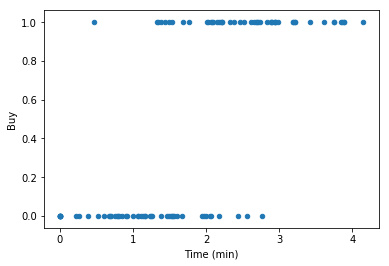

In [85]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [86]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.fit(X_train, y_train, epochs=25,verbose=0)  ## do not print out iterations results 

In [110]:
## predict
y_pred  = model.predict(X_test)
y_class_pred = y_pred > 0.5

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y_test, y_class_pred)))

The accuracy score is 0.900


### Cross Validation - Kfold validation

In [114]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [115]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [116]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [117]:
from sklearn.model_selection import cross_val_score, KFold

In [119]:
cv = KFold(3, shuffle=True)  ## random 2 splits

In [120]:
scores = cross_val_score(model, X, y, cv=cv)

In [121]:
scores  ## accurace score for 2 folds

array([0.70588235, 0.87878788, 0.72727273])